# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin price analysis: BTC falls by $1,800 in bearish streak.   TL;DR Breakdown Bitcoin price analysis reveals that the king has taken a hard blow of over $1,800.Current support is found at the $46,750 mark.Current resistance is found at the $47,000 mark. Bitcoin price analysis reveals that the king of cryptocurrency has taken a hard blow to fall down over $1,800 in a flashy crash from the $48,600 range. The king of cryptocurrency was showing bearish tendencies since yesterday, and at the time of writing, the price has fallen down to the $46,000 range. The king of cryptocurrency is trading hands for a fluctuating range between $46,750 and $46,880. The market is now seeing bearish crossovers all over the charts. BTC/USD 1-day candlestick chart marked with bearish crossovers The one-day Bitcoin price analysis candlesticks chart is showing the bearish crossovers currently engulfing the cryptocurrency and the market as a whole. The upper Bollinger band is still found above the $50,000 barrier marking the strongest resistance on the chart. The nine-day moving average (SMA 9) is also serving as a bearish crossover at the $48,207 mark, while the current price hovers near the $46,900 mark. BTC/USD 1-day candlestick price chart. Source: Trading View The Bollinger bands&#8217; average is also lingering between the SMA 9 at the $47,498 mark posing as the last bearish crossover on the daily candlesticks chart. The lower Bollinger band is found at the $44303 mark serving as the strongest support mark ... ... [| Skaityti daugiau](https://api.follow.it/track-rss-story-click/v3/tHfgumto13CU3NQZBpRu3KgHTd9OkkKt) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- U.S. urges citizens to reconsider travelling to Canada, citing 'high level of COVID-19' | CBC News.  The U.S. Centers for Disease Control and Prevention issued the Level 3 travel advisory for Canada on Monday, which indicate "a high level of COVID-19 in the country." ... [| Skaityti daugiau](http://www.cbc.ca/news/world/coronavirus-covid19-canada-world-august30-2021-1.6157958) 

### Kainų kaita pandemijos metu

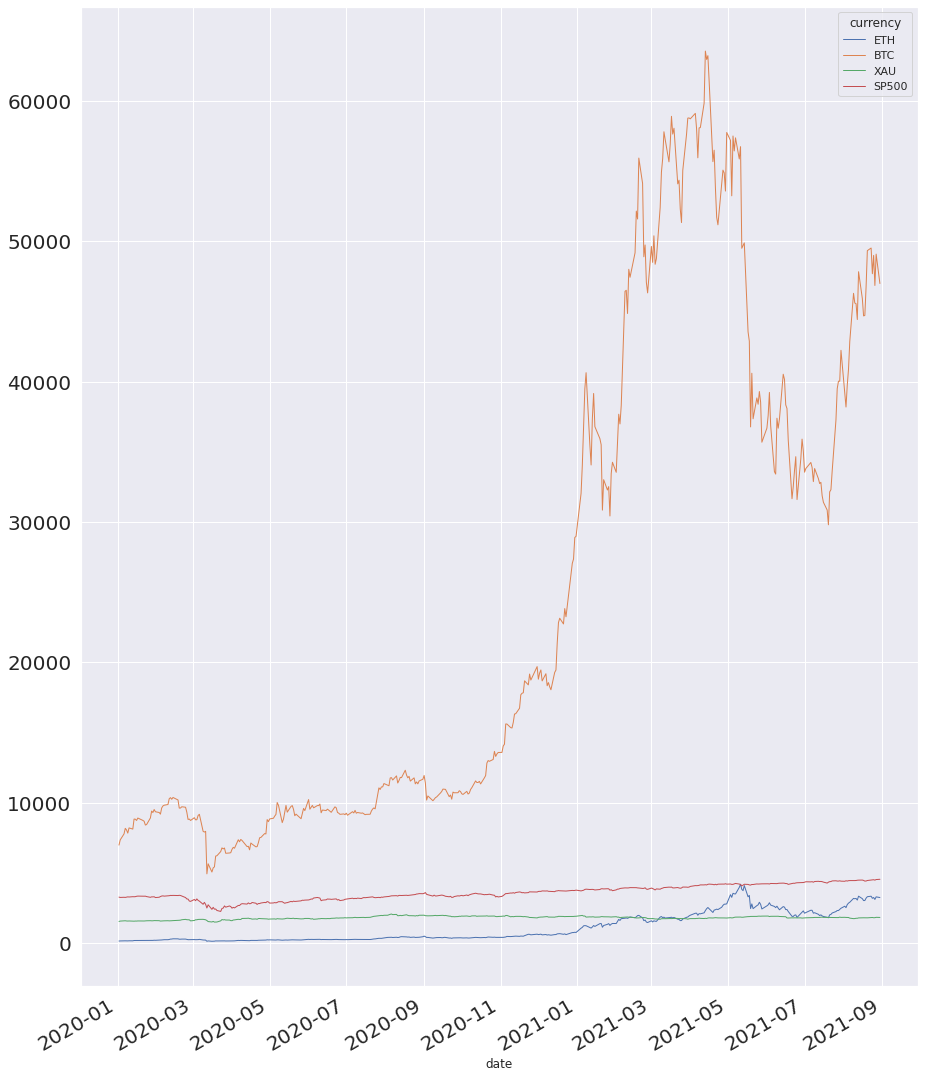

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.888255,0.186920,0.880121
BTC,0.888255,1.000000,0.137582,0.832942
XAU,0.186920,0.137582,1.000000,0.354651
SP500,0.880121,0.832942,0.354651,1.000000


In [8]:
#hide ### Koreliacijos matrica.

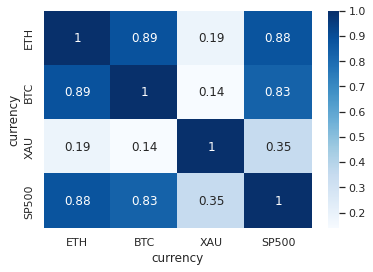

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')